In [31]:
%matplotlib inline
from vic.dataloader import load_orl, make_fixed_test_indices, split_with_fixed_test
from vic.models import LBPH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [32]:
data = load_orl("../data/ORL")
test_idx, pool_idx = make_fixed_test_indices(data, n_test=3, seed=0)

In [33]:
Xtr, ytr, Xte, yte = split_with_fixed_test(data, test_idx, pool_idx, 7, seed=0)
print(f"Train size: {Xtr.shape[0]}, Test size: {Xte.shape[0]}")

Train size: 280, Test size: 120


In [34]:
lbph = LBPH()

In [35]:
lbph.fit(Xtr, ytr)

In [36]:
y_pred = lbph.predict(Xte)

In [37]:
accuracy_score(yte, y_pred)

0.9833333333333333

In [38]:
train_sizes = np.arange(1, 8)
accuracy_scores = {}
conf_matrices = {}

for train_size in train_sizes:
    Xtr, ytr, Xte, yte = split_with_fixed_test(
        data, test_idx, pool_idx, train_size, seed=0
    )
    lpbh = LBPH()
    lbph.fit(Xtr, ytr)
    y_pred = lbph.predict(Xte)
    accuracy_scores[train_size] = accuracy_score(yte, y_pred)
    conf_matrices[train_size] = confusion_matrix(yte, y_pred)

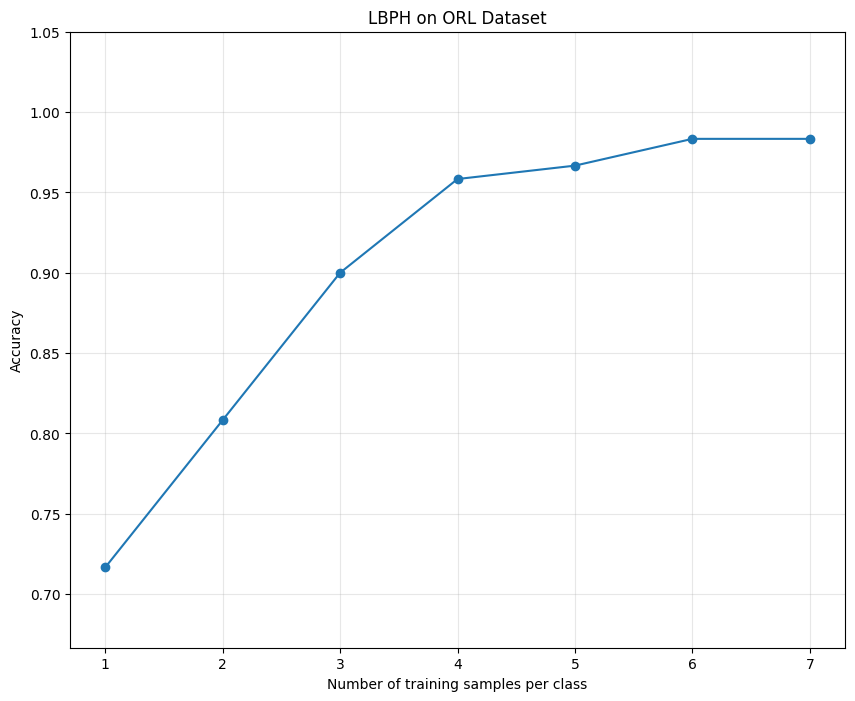

In [40]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train_sizes, accuracy_scores.values(), marker="o")
plt.title("LBPH on ORL Dataset")
plt.xlabel("Number of training samples per class")
plt.ylabel("Accuracy")
plt.xticks(train_sizes)
plt.grid(True, alpha=0.3)
plt.ylim(min(accuracy_scores.values()) - 0.05, 1.05)
plt.show()

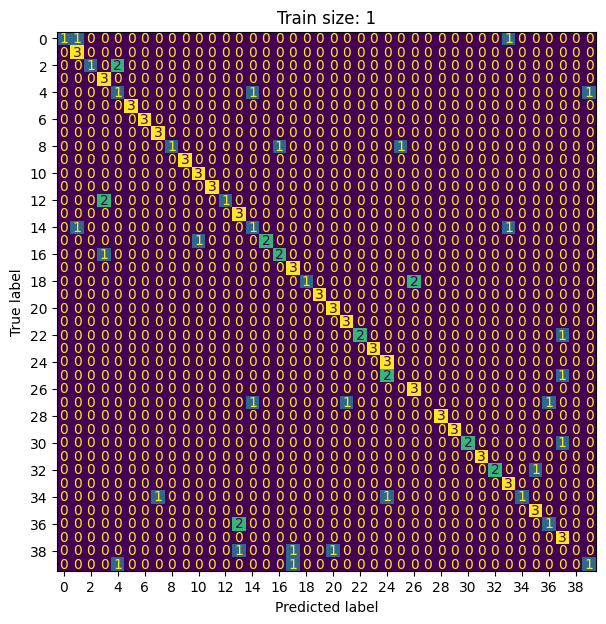

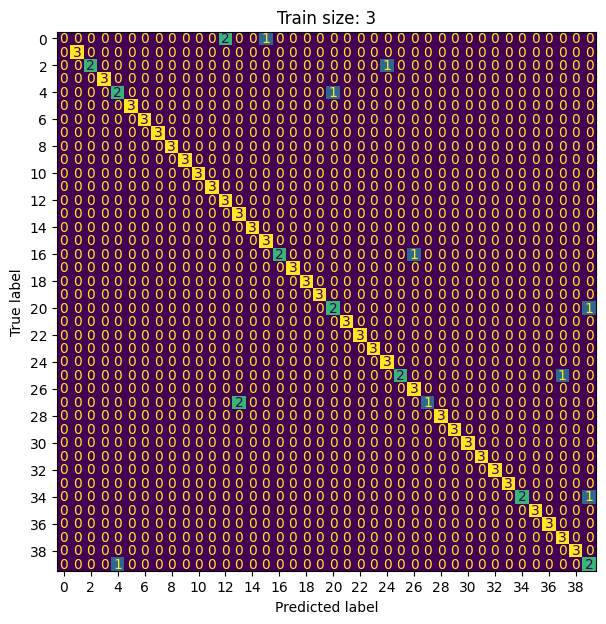

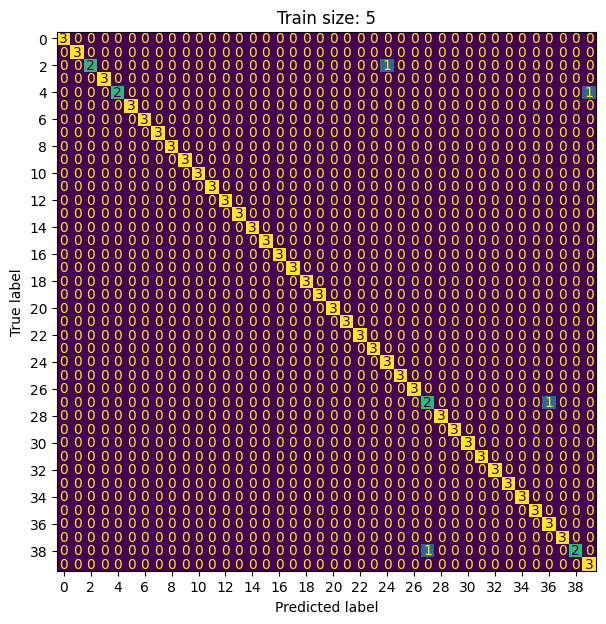

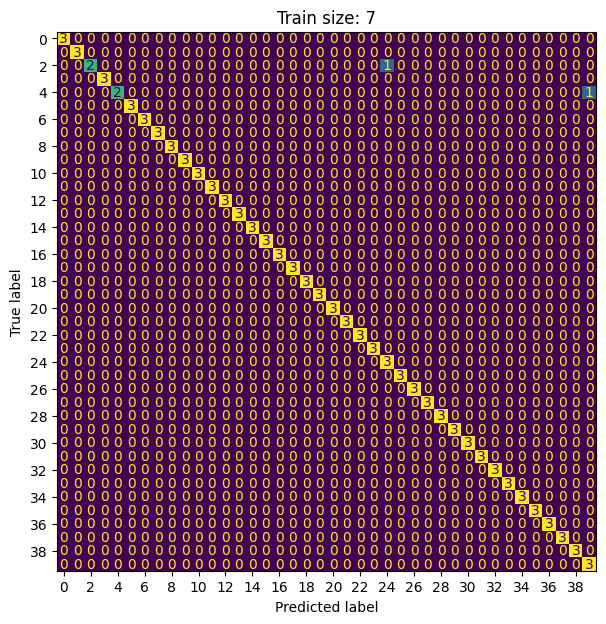

In [ ]:
sizes_to_plot = [1, 3, 5, 7]

for i, size in enumerate(sizes_to_plot):
    cm = conf_matrices[size]

    fig, ax = plt.subplots(figsize=(7, 7))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(colorbar=False, ax=ax)

    ax.set_xticks(np.arange(0, 40, 2))
    ax.set_yticks(np.arange(0, 40, 2))

    plt.title(f"Train size: {size}")
    plt.show()